In [14]:
import os
import pickle

from vega import VegaLite
from kiwiii.sqliteconnection import Connection
from chorus.model.graphmol import Compound
from chorus import molutil
from chorus import wclogp

DATA_DIR = os.path.join(os.getcwd(), "../")
DEST_PATH = os.path.join(os.getcwd(), "results")

con = Connection(os.path.join(DATA_DIR, 'sdf_demo.sqlite3'))

tbl = con.document()["tables"][0]
rcds = []
for row in con.rows_iter((tbl["entity"].split(":")[1], )):
    mol = Compound(pickle.loads(row["_mol"]))
    rcds.append({
        "mw": molutil.mw(mol),
        "logP": wclogp.wclogp(mol),
        "H-donor": molutil.H_donor_count(mol),
        "H-acceptor": molutil.H_acceptor_count(mol),
        "Lipinsky": 4 - molutil.rule_of_five_violation(mol)
    })

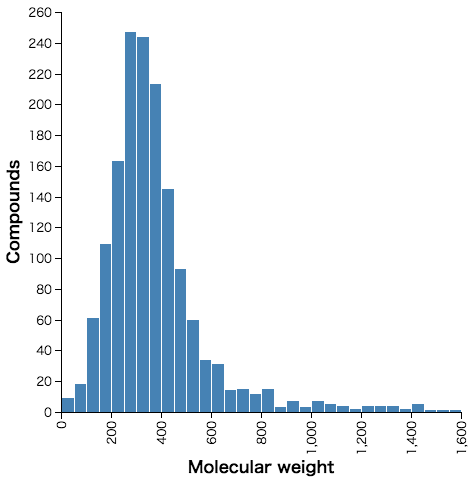

In [20]:
VegaLite({
    "width": 400,
    "height": 400,
    "data": {
        "values": rcds
    },
    "transform": {
        "filter": "datum.mw < 1600"
    },
    "mark": "bar",
    "encoding": {
        "x": {
            "bin": {
                "step": 50
            },
            "type": "quantitative",
            "field": "mw",
            "axis": {
                "grid": False,
                "title": "Molecular weight",
                "titleFontSize": 16,
                "tickLabelFontSize": 12
            }
        },
        "y": {
            "type": "quantitative",
            "aggregate": "count",
            "field": "*",
            "axis": {
                "grid": False,
                "title": "Compounds",
                "titleFontSize": 16,
                "tickLabelFontSize": 12
            }
        },
  }
})


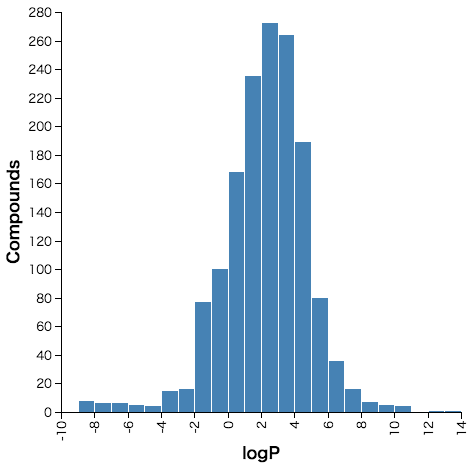

In [24]:
VegaLite({
    "width": 400,
    "height": 400,
    "data": {
        "values": rcds
    },
    "transform": {
        "filter": "datum.logP > -10"
    },
    "mark": "bar",
    "encoding": {
        "x": {
            "bin": {
                "step": 1
            },
            "type": "quantitative",
            "field": "logP",
            "axis": {
                "grid": False,
                "title": "logP",
                "titleFontSize": 16,
                "tickLabelFontSize": 12
            }
        },
        "y": {
            "type": "quantitative",
            "aggregate": "count",
            "field": "*",
            "axis": {
                "grid": False,
                "title": "Compounds",
                "titleFontSize": 16,
                "tickLabelFontSize": 12
            }
        },
  }
})


In [30]:
VegaLite({
    "width": 400,
    "height": 400,
    "data": {
        "values": rcds
    },
    "mark": "bar",
    "encoding": {
        "x": {
            "type": "nominal",
            "field": "Lipinsky",
            "axis": {
                "grid": False,
                "title": "Lipinsky rule of 5",
                "titleFontSize": 16,
                "tickLabelFontSize": 12
            }
        },
        "y": {
            "type": "quantitative",
            "aggregate": "count",
            "field": "*",
            "axis": {
                "grid": False,
                "title": "Compounds",
                "titleFontSize": 16,
                "tickLabelFontSize": 12
            }
        },
  }
})
